___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
# IMPORTS HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [14]:
# CODE HERE

df = pd.read_csv('../Data/Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [15]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [16]:
# CODE HERE

df.columns = ["Value"]
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [5]:
df

**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

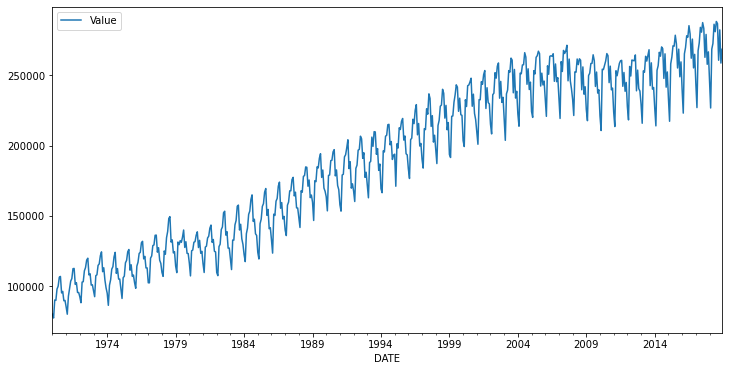

In [17]:
# CODE HERE
df.plot(figsize=(12,6))

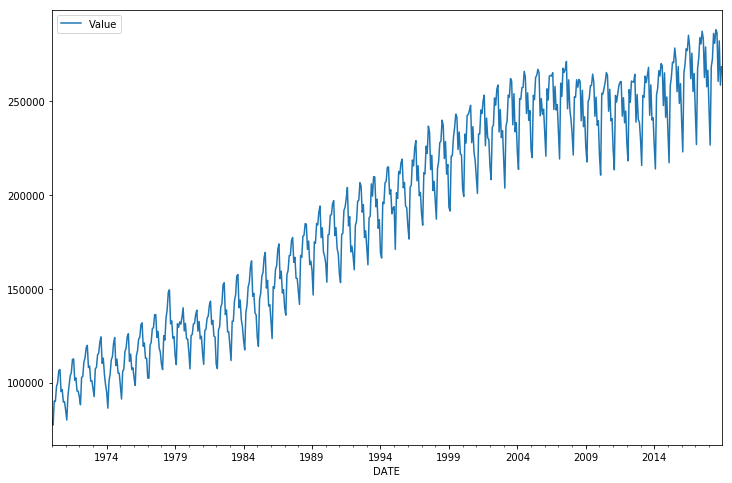

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

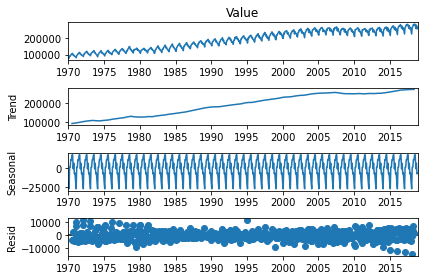

In [21]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Value'])
results.plot();

<AxesSubplot:xlabel='DATE'>

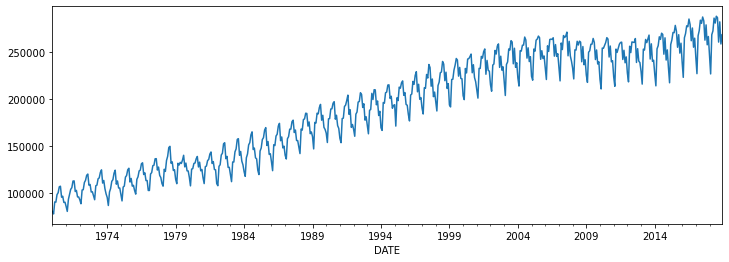

In [22]:
results.observed.plot(figsize=(12,4))

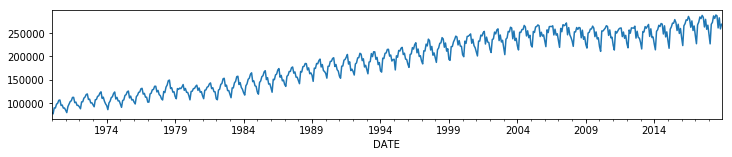

<AxesSubplot:xlabel='DATE'>

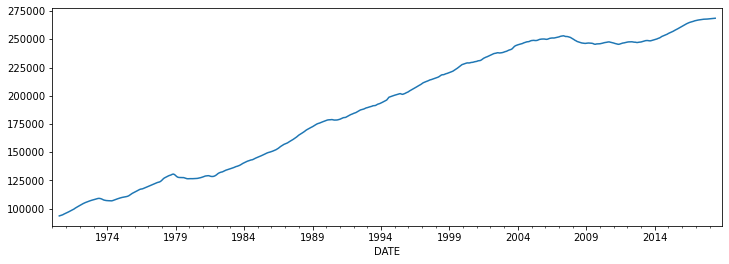

In [23]:
results.trend.plot(figsize=(12,4))

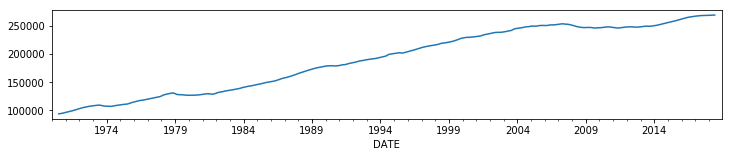

<AxesSubplot:xlabel='DATE'>

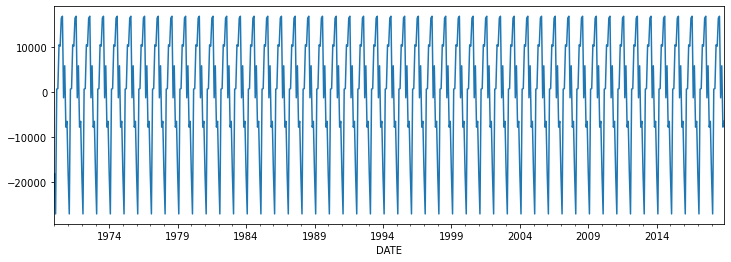

In [24]:
results.seasonal.plot(figsize=(12,4))

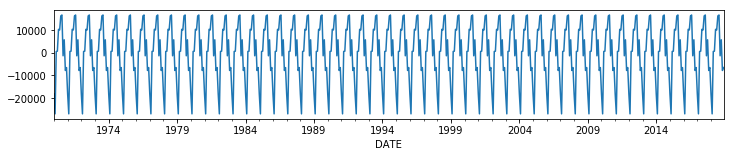

<AxesSubplot:xlabel='DATE'>

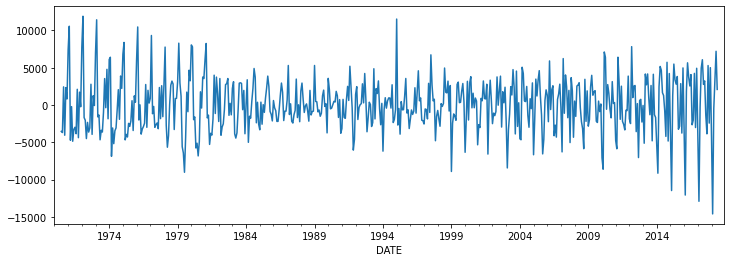

In [25]:
results.resid.plot(figsize=(12,4))

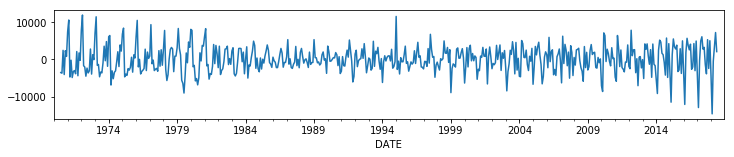

## Train Test Split

**TASK: Figure out the length of the data set**

In [26]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [27]:
# CODE HERE
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]


In [31]:
len(test)

12

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [32]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(train)

MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [37]:
#CODE HERE
from keras.preprocessing.sequence import TimeseriesGenerator

In [38]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [39]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [40]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [42]:
# CODE HERE

model.fit_generator(generator, epochs=15)

<ipython-input-42-8dd7d77906e8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=15)


Epoch 1/15
564/564 [==============================] - 3s 3ms/step - loss: 0.0110
Epoch 2/15
564/564 [==============================] - 2s 4ms/step - loss: 0.0063
Epoch 3/15
564/564 [==============================] - 2s 4ms/step - loss: 0.0047A: 0s - loss: 0.004
Epoch 4/15
564/564 [==============================] - 3s 5ms/step - loss: 0.0040A: 2s 
Epoch 5/15
564/564 [==============================] - 2s 4ms/step - loss: 0.0025A: 0s - l
Epoch 6/15
564/564 [==============================] - 2s 4ms/step - loss: 0.0018
Epoch 7/15
564/564 [==============================] - 3s 4ms/step - loss: 0.0013
Epoch 8/15
564/564 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 9/15
564/564 [==============================] - 3s 5ms/step - loss: 0.0011
Epoch 10/15
564/564 [==============================] - 4s 6ms/step - loss: 9.8465e-04
Epoch 11/15
564/564 [==============================] - 4s 7ms/step - loss: 8.7237e-04
Epoch 12/15
564/564 [==============================] - 4s 7ms/ste

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

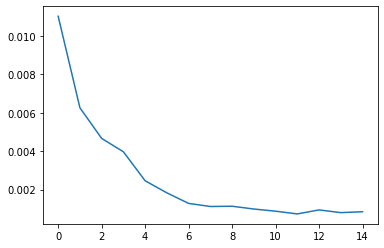

In [43]:
# CODE HERE
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [44]:
# CODE HERE
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [50]:
# CODE HERE
test_predictions = []


first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [51]:
#CODE HERE

true_predictions = scaler.inverse_transform(test_predictions)

In [52]:
true_predictions

array([[253193.60916942],
       [242347.93380314],
       [272118.84889805],
       [279975.94133288],
       [289766.44518328],
       [289480.9925065 ],
       [294109.0641793 ],
       [290056.92731202],
       [275334.47029924],
       [283964.69709653],
       [268531.79871583],
       [272800.38968378]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [53]:
# CODE HERE
test["Predictions"] = true_predictions

<ipython-input-53-57416537409b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_predictions


In [54]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,253193.609169
2018-02-01,226660.0,242347.933803
2018-03-01,268480.0,272118.848898
2018-04-01,272475.0,279975.941333
2018-05-01,286164.0,289766.445183
2018-06-01,280877.0,289480.992507
2018-07-01,288145.0,294109.064179
2018-08-01,286608.0,290056.927312
2018-09-01,260595.0,275334.470299


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

<AxesSubplot:xlabel='DATE'>

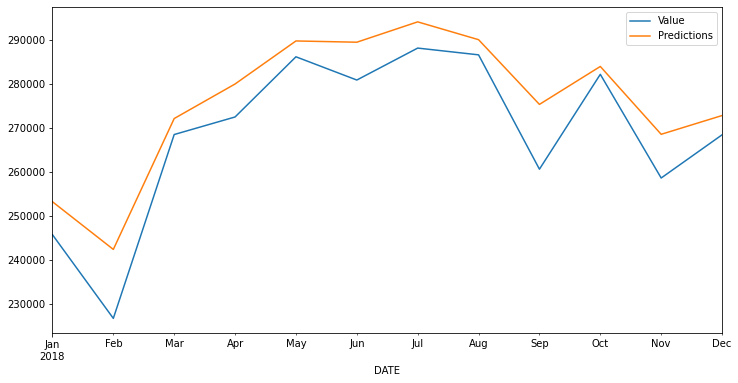

In [56]:
# CODE HERE

test.plot(figsize=(12,6))

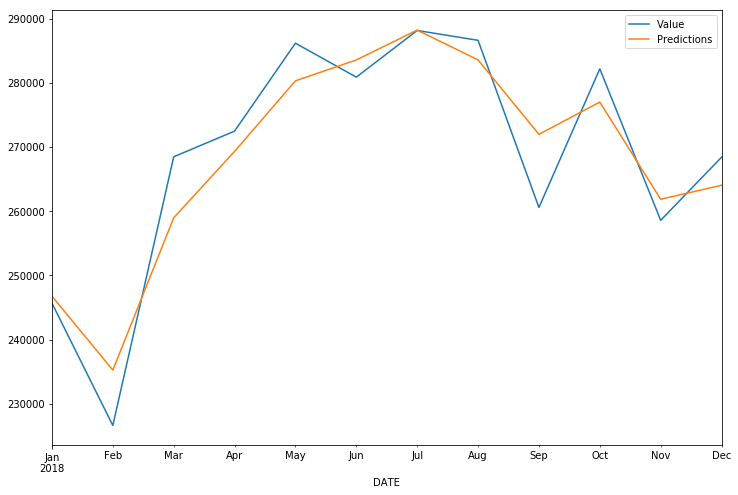

# Saving Models

**TASK: Optional, Save your model!**

In [57]:
model.save('solution.h5')